<a href="https://colab.research.google.com/github/roszcz/matplotlib-cinematic-universe/blob/master/MCU_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scientific Animations with Matplotlib

Entrypoint to the code accompanying the blogpost of the same title: https://labs.filestack.com/posts/pyplot-animations/


#### Get code and prepare environment

In [1]:
!git clone https://github.com/roszcz/matplotlib-cinematic-universe

import sys
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['savefig.facecolor'] = 'white'

sys.path.append('./matplotlib-cinematic-universe')

fatal: destination path 'matplotlib-cinematic-universe' already exists and is not an empty directory.


#### Define a 1D function for animation

$\Psi^m(x, \phi) = \frac{1}{m} \sum_{n=1}^{m} \cos(n\cdot\phi) \cdot \sin(n\cdot x + \phi)$

In [2]:
def psi(x: np.array, phi: float, m: int = 4) -> np.array:
    frequencies = range(1, m + 1)
    signals = []
    for frequency in frequencies:
        amp = np.cos(phi * frequency)
        signal = amp * np.sin(x * frequency)
        signals.append(signal)

    psi_values = np.sum(signals, axis=0) / m
    return psi_values

Show static plot of $\psi$ for $m = 5$, $\phi = \frac{\pi}{6}$ and $x \in [0, 8\pi]$

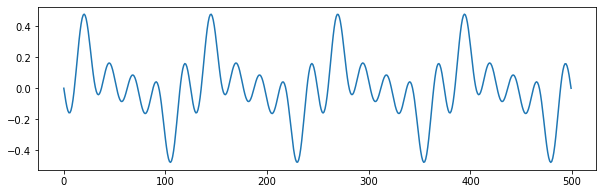

In [3]:
x = np.linspace(0, 8 * np.pi, 500)
m = 5
phi = np.pi / 6

psi_values = psi(x, phi, m)
plt.figure(figsize=[10, 3])
plt.plot(psi_values)

In [4]:
from mcu.squiggle import WavyBase


class WavyScene(WavyBase):
    SCENE_ID = 'WAVY'

    def __init__(self, m: int = 4, howmany_pi: int = 6) -> None:
        super().__init__()

        self.figsize = [10, 3]
        f, ax = plt.subplots(
            nrows=1,
            ncols=1,
            figsize=self.figsize
        )

        self.x_range = howmany_pi * np.pi
        self.x = np.linspace(0, self.x_range, 500)
        self.m = m
        self.freqs = range(1, m + 1)

        self.figure = f
        self.axes = [ax]

    def draw_all(self, phase_shift: float) -> None:
        ax = self.axes[0]
        signals = []
        for freq in self.freqs:
            amp = np.cos(freq * phase_shift)
            signal = amp * np.sin(self.x * freq + phase_shift)
            signals.append(signal)

        signal = np.sum(signals, axis=0) / self.m
        ax.plot(self.x, signal, lw=5)
        ax.set_xlim(0, self.x_range)
        ax.set_ylim(-1, 1)

        shift_pi = phase_shift / np.pi
        title = f'Phase shift: {shift_pi:.2f}'
        ax.set_title(title, loc='left', fontsize=16)

        ax.tick_params(
            axis='both',
            which='both',
            right=False,
            top=False
        )

        ax.set_xlabel('x', fontsize=16)
        y_label = f'Psi, m = {self.m}'
        ax.set_ylabel(y_label, fontsize=16)

Rendering to: tmp/scenes/WAVY-EDFPQLMWUFUKJOBV


100%|██████████| 300/300 [00:55<00:00,  5.37it/s]


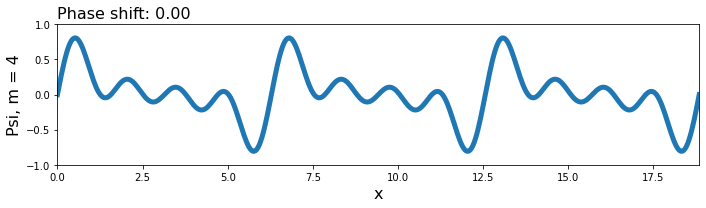

In [5]:
w = WavyScene();
content_dir = w.render()

# Show the first frame
w.draw_all(0)

gif saved to: tmp/tmp.gif


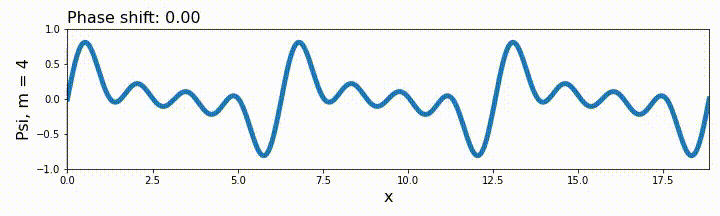

In [6]:
from mcu import ffmpeg
gif_path = 'tmp/tmp.gif'
ffmpeg.image_directory_to_gif(content_dir, gif_path)

from IPython.display import Image
Image(open(gif_path,'rb').read())